# Evaluation
## **SNLP team project**

In this notebook, we evaluate the models.

**Notebook implements following functionality:**
* Load finetuned models
* Evaluate test score

In [74]:
# External utils
import csv
import time
import torch
import pickle 
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Torch libs
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader

import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModel
from transformers.optimization import get_linear_schedule_with_warmup
from transformers import BertModel

In [75]:
#@title Setup & Config

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F


%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# For google drive integration
from google.colab import drive

### Load model

In [83]:
if skip_training: # Load model

  # Prompt for which model to load
  models_path = PROJECT_PATH + 'models/'
  models = !find '{models_path}'*
  for i,m in enumerate(models):
    print(i, m)
  input_str = input('Input model to load (0-{}): '.format(len(models)-1))
  print('Loading model...')
  
  model = SentimentClassifier(N_CLUSTERS, DROPOUT)
  model = model.to(device)
  model.load_state_dict(torch.load(models[int(input_str)], map_location=device))
  print('Model loaded.')

  loss_fn = nn.CrossEntropyLoss().to(device)

0 /content/gdrive/MyDrive/SNLP project/models/archive
1 /content/gdrive/MyDrive/SNLP project/models/archive/Copy of covid-twitter-bert-v2_epoch_1.pt
2 /content/gdrive/MyDrive/SNLP project/models/archive/Copy of covid-twitter-bert-v2_epoch_2.pt
3 /content/gdrive/MyDrive/SNLP project/models/bert-large-cased_epoch_1.pt
4 /content/gdrive/MyDrive/SNLP project/models/bert-large-cased_epoch_2.pt
5 /content/gdrive/MyDrive/SNLP project/models/covid-twitter-bert-v2_epoch_1.pt
6 /content/gdrive/MyDrive/SNLP project/models/covid-twitter-bert-v2_epoch_2.pt
7 /content/gdrive/MyDrive/SNLP project/models/roberta-large_epoch_1.pt
8 /content/gdrive/MyDrive/SNLP project/models/roberta-large_epoch_2.pt
Input model to load (0-8): 6
Loading model...
Model loaded.


In [84]:
model.eval()

test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

print('Test accuracy for the model: {:.4f}'.format(test_acc))

Test accuracy for the model: 0.9222


In [89]:
n_sample = 1000
tweets = df_test.sample(n=n_sample, replace=False)
encoded_tweets = encode_tweets(tweets["content"])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [90]:
predicted_labels = predict_sentiment(encoded_tweets, n_sample)

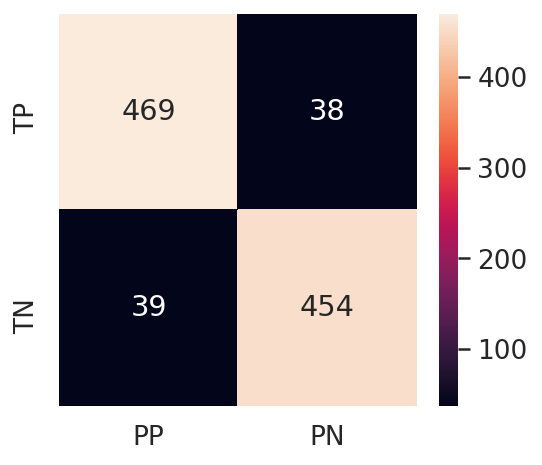

In [91]:
row_labels = ['TP','TN']
col_labels = ['PP','PN']
CM = confusion_matrix(tweets["Cluster"].values, predicted_labels)
df_cm = pd.DataFrame(CM, index=row_labels[:2], columns=col_labels[:2])
plt.figure(figsize=(4,3.6))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.savefig('ct_bert_v2_confusion_matrix.pdf')

In [92]:
tweets['predicted'] = list(predicted_labels) 
n = 10
seed = 1234
pd.set_option('display.max_colwidth',500)